In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [5]:
test_raw = pd.read_csv('test_set.csv')
train_raw = pd.read_csv('train_set.csv')
valid_raw = pd.read_csv('valid_set.csv')

In [6]:
from data_process import convert_to_categorical
test = convert_to_categorical(test_raw)
train = convert_to_categorical(train_raw)
valid = convert_to_categorical(valid_raw)

# Random Forest

In [7]:
from data_process import split_and_drop
X_train, y_train = split_and_drop(train, version = 'default')
X_valid, y_valid = split_and_drop(valid, version = 'default')
X_test, y_test = split_and_drop(test, version = 'default')

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5059
           1       0.84      0.85      0.85      5961

    accuracy                           0.83     11020
   macro avg       0.83      0.83      0.83     11020
weighted avg       0.83      0.83      0.83     11020

Accuracy: 0.8327586206896552


In [10]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. feature ComputerSkills (0.3062816106397765)
2. feature TypeScript (0.11314445604992014)
3. feature PreviousSalary (0.10916260160463119)
4. feature YearsCode (0.07996044510569555)
5. feature YearsCodePro (0.07478204523838677)
6. feature JavaScript (0.05325174539407183)
7. feature HTML/CSS (0.03545089187088646)
8. feature EdLevel (0.03386366959191703)
9. feature SQL (0.03015008988566993)
10. feature MySQL (0.019855835122797955)
11. feature PostgreSQL (0.01853591914460442)
12. feature Docker (0.01784010942175426)
13. feature Git (0.017229132716101953)
14. feature AWS (0.01708862357975152)
15. feature Python (0.016088492139178966)
16. feature MentalHealth (0.014442630459983624)
17. feature Age (0.01170402536172952)
18. feature Employment (0.010170486446789771)
19. feature Gender (0.009206553719500141)
20. feature MainBranch (0.007710726103972618)
21. feature Accessibility (0.004079910402879854)


In [11]:
import shap

In [14]:
# # Create the SHAP explainer
# explainer = shap.Explainer(clf)

In [15]:
X_sample = shap.utils.sample(X_train, 100)  # Adjust the number 100 as appropriate
# shap_values = explainer(X_sample)


In [ ]:
# shap_values = explainer(X_train)

In [20]:
explainer = shap.TreeExplainer(clf)

In [22]:
print(type(shap_values))
print(len(shap_values))  # For multi-class
print(shap_values[0].shape)  # Replace 0 with the index of the class if multi-class


<class 'list'>
2
(100, 21)


In [23]:
print(X_test.shape)


(11020, 21)


In [21]:
shap_values = explainer.shap_values(X_sample)


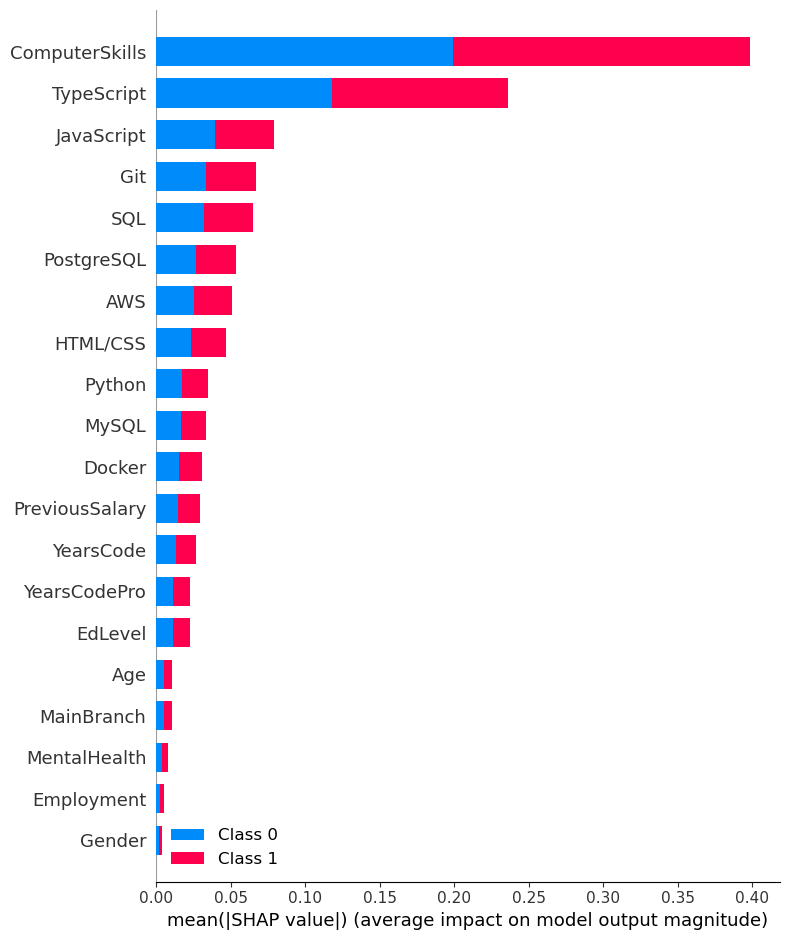

In [27]:
shap.summary_plot(shap_values, X_test)


In [35]:
X_train, y_train = split_and_drop(train, version = 'dropComputerSkills')
X_valid, y_valid = split_and_drop(valid, version = 'dropComputerSkills')
X_test, y_test = split_and_drop(test, version = 'dropComputerSkills')

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5059
           1       0.77      0.77      0.77      5961

    accuracy                           0.75     11020
   macro avg       0.75      0.75      0.75     11020
weighted avg       0.75      0.75      0.75     11020

Accuracy: 0.7539019963702359


In [38]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. feature PreviousSalary (0.18484295068573292)
2. feature TypeScript (0.15213110485380488)
3. feature YearsCode (0.12631942355145487)
4. feature YearsCodePro (0.11651062940664143)
5. feature JavaScript (0.08455001411570373)
6. feature HTML/CSS (0.04869968984124014)
7. feature EdLevel (0.04845605746327349)
8. feature SQL (0.04039022662200423)
9. feature MySQL (0.02326395360709931)
10. feature MentalHealth (0.020189746566064915)
11. feature AWS (0.019899077762883764)
12. feature PostgreSQL (0.019705233803162078)
13. feature Docker (0.019177635336506883)
14. feature Git (0.018939171655650275)
15. feature Python (0.018474296939388436)
16. feature Age (0.014685867807728544)
17. feature Employment (0.01453695004034465)
18. feature Gender (0.013388741176864529)
19. feature MainBranch (0.009902972886167153)
20. feature Accessibility (0.0059362558782838325)


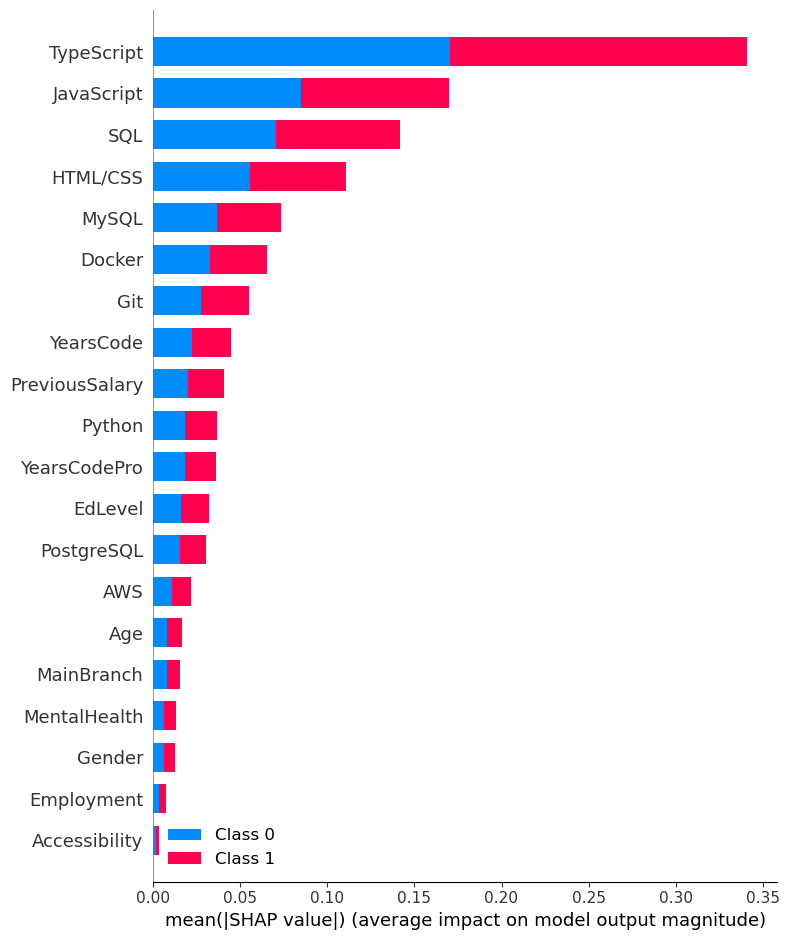

In [39]:
explainer = shap.TreeExplainer(clf)
X_sample = shap.utils.sample(X_train, 100) 
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_test)
